### Regression

In [2]:
import pandas as pd 
data = pd.read_csv('../Data/house_price.csv', encoding = 'utf-8')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

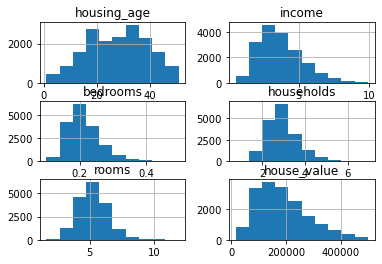

In [3]:
data.hist()

In [14]:
X = data[data.columns[0:5]]
y = data[['house_value']]

In [15]:
print(X.shape)
print(y.shape)

(17689, 5)
(17689, 1)


In [21]:
from sklearn.model_selection import *
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=410)
print(X_train.shape)
print(y_train.shape)

(13266, 5)
(13266, 1)


In [22]:
from sklearn.preprocessing import *
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [23]:
scaler_minmax.fit(X_train)
scaler_standard.fit(X_train)

StandardScaler()

In [24]:
X_train_scale_standard = scaler_standard.transform(X_train)

In [25]:
pd.DataFrame(X_train_scale_standard).describe()

,0,1,2,3,4
count,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04
mean,1.111395e-17,-3.715807e-17,8.053343e-16,-2.053151e-16,-4.024370e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.335306e+00,-2.081814e+00,-2.222001e+00,-2.984493e+00,-3.038392e+00
25%,-8.274617e-01,-7.429980e-01,-6.963466e-01,-6.535024e-01,-6.874863e-01
50%,5.950557e-02,-1.459241e-01,-1.843285e-01,-1.369417e-01,-4.067320e-02
75%,7.690794e-01,6.036928e-01,5.220824e-01,4.923068e-01,5.974551e-01
max,2.099530e+00,4.116513e+00,5.574796e+00,5.420904e+00,5.619257e+00


In [26]:
X_test_scale_standard = scaler_standard.transform(X_test)
pd.DataFrame(X_test_scale_standard).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.017634,0.032179,-0.014401,-0.003994,0.008806
std,1.001960,1.021830,1.008044,0.964137,0.998711
min,-2.335306,-2.081814,-1.920714,-2.353314,-2.697989
25%,-0.827462,-0.739654,-0.733424,-0.654520,-0.684822
50%,0.059506,-0.111392,-0.180251,-0.122804,-0.048148
75%,0.769079,0.651141,0.528522,0.491820,0.624657
max,2.099530,4.051865,5.502672,5.329237,5.219471


In [27]:
from sklearn.linear_model import *
model = LinearRegression()
model.fit(X_train_scale_standard, y_train)

LinearRegression()

In [31]:
pred_train = model.predict(X_train_scale_standard)
model.score(X_train_scale_standard, y_train)
print(pred_train)

[[ 84714.1962184 ]
 [125493.43474621]
 [198390.81429467]
 ...
 [271753.98465972]
 [159188.12456332]
 [139829.36984278]]


In [32]:
pred_test = model.predict(X_test_scale_standard)
model.score(X_test_scale_standard, y_test)
print(pred_test)

[[147642.30293409]
 [149344.90299401]
 [220886.47082173]
 ...
 [106133.25196371]
 [179063.74894036]
 [283256.08225564]]


### dir을 통해서 패키지 내용을 볼 수 있음

In [39]:
import sklearn
test = dir(sklearn)
for i in test:
    print(i)

__SKLEARN_SETUP__
__all__
__builtins__
__cached__
__check_build
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
__version__
_config
_distributor_init
_loss
base
clone
config_context
exceptions
externals
get_config
linear_model
logger
logging
metrics
model_selection
os
preprocessing
random
set_config
setup_module
show_versions
svm
sys
utils


In [40]:
# 회귀모델은 R2와 RMSE를 통해 모델의 성능을 평가 
import numpy as np 
from sklearn.metrics import *
test = dir(sklearn.metrics)
for i in test:
    print(i)

ConfusionMatrixDisplay
DetCurveDisplay
DistanceMetric
PrecisionRecallDisplay
RocCurveDisplay
SCORERS
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_base
_classification
_dist_metrics
_pairwise_fast
_plot
_ranking
_regression
_scorer
accuracy_score
adjusted_mutual_info_score
adjusted_rand_score
auc
average_precision_score
balanced_accuracy_score
brier_score_loss
calinski_harabasz_score
check_scoring
classification_report
cluster
cohen_kappa_score
completeness_score
confusion_matrix
consensus_score
coverage_error
d2_tweedie_score
davies_bouldin_score
dcg_score
det_curve
euclidean_distances
explained_variance_score
f1_score
fbeta_score
fowlkes_mallows_score
get_scorer
hamming_loss
hinge_loss
homogeneity_completeness_v_measure
homogeneity_score
jaccard_score
label_ranking_average_precision_score
label_ranking_loss
log_loss
make_scorer
matthews_corrcoef
max_error
mean_absolute_error
mean_absolute_percentage_error
mean_gamma_deviance
mean_

### 모델 평가

In [42]:
mean_absolute_error(y_test, pred_test)

47319.20636832503

In [43]:
mean_squared_error(y_test, pred_test)


3992429341.684003

In [45]:
def MAPE(y_test, pred_test):
    return np.mean(np.abs((y_test - pred_test)/y_test)) * 100
MAPE(y_test, pred_test)

/Users/sig6774/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


house_value    30.684093
dtype: float64

In [46]:
def MPE(y_test, pred_test):
    return np.mean(((y_test - pred_test)/y_test)) * 100
MPE(y_test, pred_test)

/Users/sig6774/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


house_value   -12.100325
dtype: float64

In [47]:
pred_train = model.predict(X_train_scale_standard)
y_train[['y_pred']] = pred_train
y_train

,house_value,y_pred
15910,80000,84714.196218
14581,97100,125493.434746
13846,107200,198390.814295
5788,218300,284334.085521
12212,130400,183984.492407
...,...,...
2233,308100,247425.188534
4232,247000,236939.755499
1670,335300,271753.984660
11665,137500,159188.124563


In [48]:
pred_test = model.predict(X_test_scale_standard)
y_test[['y_pred']] = pred_test
y_test

,house_value,y_pred
12613,124100,147642.302934
11537,139200,149344.902994
3110,275000,220886.470822
7839,184500,121907.407701
1051,364700,337715.387301
...,...,...
14385,99300,107409.107409
11629,137800,178629.507694
15135,90600,106133.251964
12424,126900,179063.748940


In [50]:
Total_test = pd.concat([X_test, y_test], axis = 1)
print(Total_test)

       housing_age  income  bedrooms  households     rooms  house_value  \
12613           26  2.8942  0.220295    2.951515  4.718182       124100   
11537           19  3.8147  0.204444    4.126551  5.024814       139200   
3110             7  4.8490  0.182025    2.391813  6.618212       275000   
7839             5  2.5125  0.230246    2.207488  4.817473       184500   
1051            30  6.9324  0.139979    2.678744  6.954106       364700   
...            ...     ...       ...         ...       ...          ...   
14385           35  2.0917  0.258387    4.149847  4.284404        99300   
11629           32  3.9646  0.185711    3.574843  5.316981       137800   
15135           19  2.7500  0.227692    4.068966  3.735632        90600   
12424           30  3.9128  0.172460    3.000000  5.901381       126900   
2273            12  5.0353  0.226599    1.810072  4.657554       305800   

              y_pred  
12613  147642.302934  
11537  149344.902994  
3110   220886.470822  
7839   

In [51]:
Total_test.to_csv('total_test.csv', encoding='utf-8')